Image Classification using Convolution Neural Network

source: https://www.kaggle.com/puneet6060/intel-image-classification?select=seg_test

Train data: 14034 images
Test data:

In [20]:
import os
import cv2
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Activation, Flatten
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
import seaborn as sns

In [2]:
def load_data(dir_path):
    '''Loads the images and its corresponding labels and returns them as a tuple'''
    
    images, labels = [], []
    folders = sorted([fold for fold in os.listdir(dir_path)])
    try: 
        folders.remove('.DS_Store')
    except ValueError:
        pass
    label = dict(zip(folders, range(len(folders))))
    
    for fold in folders:
        for img in os.listdir(dir_path+'/'+fold):
            image = cv2.imread(dir_path+'/'+fold+'/'+img)
            image = cv2.resize(image,(150,150))
            images.append(image)
            labels.append(label[fold])
    return (np.array(images),np.array(labels))

In [4]:
fold_test = sorted([fold for fold in os.listdir('/Users/archana/Documents/GitHub/intel_image_classification/Image-classification-using-CNN/seg_test')])
dict(zip(fold_test, range(len(fold_test))))

{'.DS_Store': 0,
 'buildings': 1,
 'forest': 2,
 'glacier': 3,
 'mountain': 4,
 'sea': 5,
 'street': 6}

In [5]:
def data_shuffle(x,y):
    '''Shuffles the index of X and y in the same order and returns it'''
    shuff_indx = np.random.permutation(len(x))
    return x[shuff_indx], y[shuff_indx]

In [6]:
## Load train_data
(X_train, y_train) = load_data('/Users/archana/Documents/GitHub/intel_image_classification/Image-classification-using-CNN/seg_train')

## Shuffle data

X_train, y_train = data_shuffle(X_train, y_train)

print("Train data")
print(f"Shape: {X_train.shape}, {y_train.shape}")

## Load test_data
(X_test, y_test) = load_data('/Users/archana/Documents/GitHub/intel_image_classification/Image-classification-using-CNN/seg_test')
X_test, y_test = data_shuffle(X_test, y_test)
print("Test data")
print(f"Shape: {X_test.shape}, {y_test.shape}")


Train data
Shape: (14034, 150, 150, 3), (14034,)
Test data
Shape: (3000, 150, 150, 3), (3000,)


In [7]:
X_train = X_train/255
X_test = X_test/255

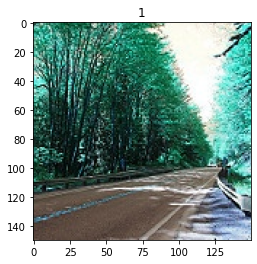

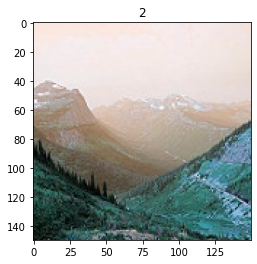

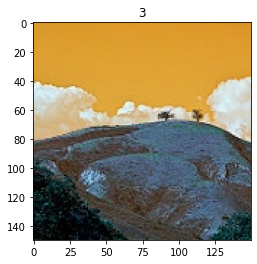

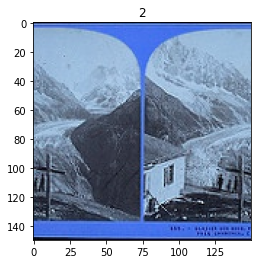

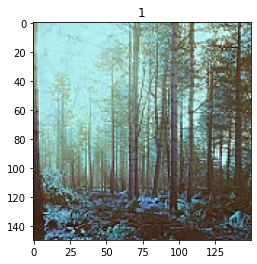

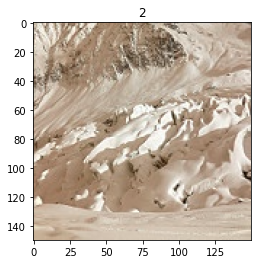

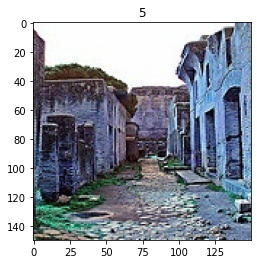

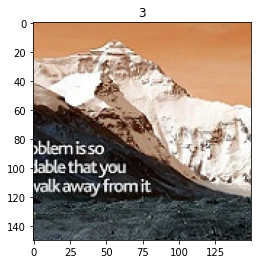

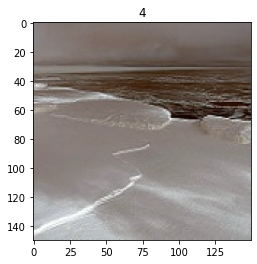

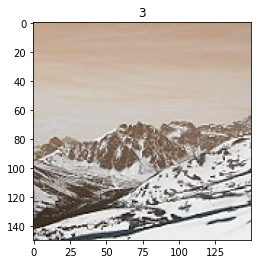

In [8]:
## Visualize input images
for i in range(10):
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.show()

In [9]:
y_train = to_categorical(y_train, num_classes = 6)
y_test = to_categorical(y_test, num_classes = 6)

In [140]:
### Convnet model architecture
model = Sequential()
#Layer 1: Convnet 1; n_strides = 1; n_padding = none; kernel = 3x3x64
model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (150, 150, 3)), kernel_initializer=)
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(48, (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation = 'softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 48)        27696     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 48)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 36, 36, 48)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 62208)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

In [141]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [143]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/10
439/439 [==============================] - 233s 531ms/step - loss: 1.0530 - accuracy: 0.5889 - val_loss: 0.8170 - val_accuracy: 0.6857
Epoch 2/10
439/439 [==============================] - 212s 482ms/step - loss: 0.7479 - accuracy: 0.7269 - val_loss: 0.6310 - val_accuracy: 0.7763
Epoch 3/10
439/439 [==============================] - 212s 483ms/step - loss: 0.5934 - accuracy: 0.7859 - val_loss: 0.6308 - val_accuracy: 0.7597
Epoch 4/10
439/439 [==============================] - 208s 475ms/step - loss: 0.4832 - accuracy: 0.8291 - val_loss: 0.6046 - val_accuracy: 0.7900
Epoch 5/10
439/439 [==============================] - 204s 465ms/step - loss: 0.3991 - accuracy: 0.8591 - val_loss: 0.5994 - val_accuracy: 0.8060
Epoch 6/10
439/439 [==============================] - 208s 475ms/step - loss: 0.3359 - accuracy: 0.8785 - val_loss: 0.5835 - val_accuracy: 0.8063
Epoch 7/10
439/439 [==============================] - 190s 434ms/step - loss: 0.2918 - accuracy: 0.8953 - val_loss: 0.6422 -

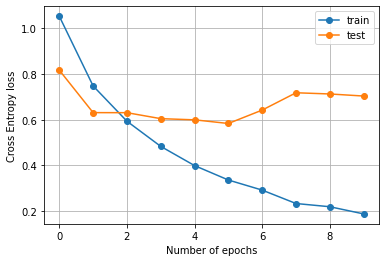

In [195]:
history.history
plt.plot(range(10), history.history['loss'], label = 'train', marker = 'o')
plt.plot(range(10), history.history['val_loss'], label = 'test', marker = 'o')
plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Cross Entropy loss")
plt.legend()

array([0])

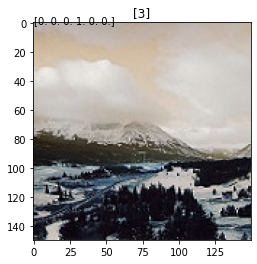

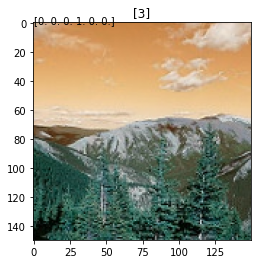

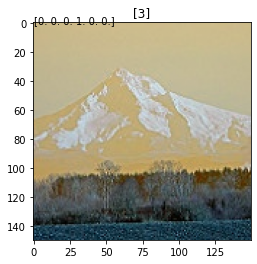

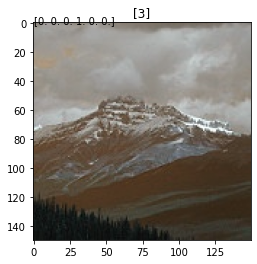

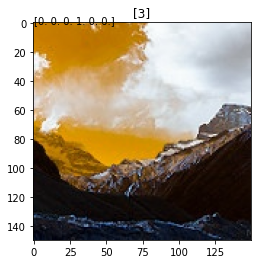

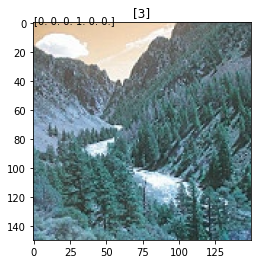

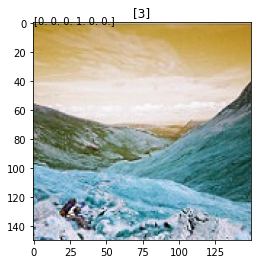

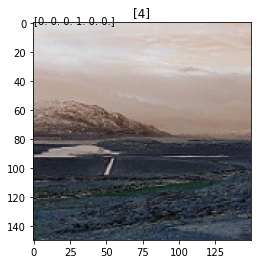

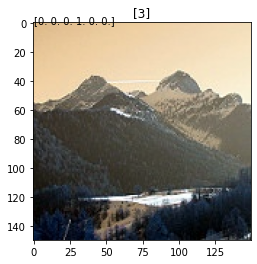

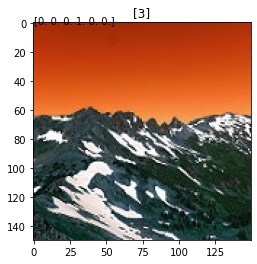

In [171]:
for i in range(1500,1510):
    plt.imshow(X_test[i])
    plt.title(model.predict_classes(X_test[i].reshape(1,150,150,3)))
    plt.annotate(y_test[i], (0,0))
    plt.show()
  

In [135]:
for i in range(len(model.weights)):
    print(f'layer: {i}')
    print(tf.math.reduce_max(model.weights[i]))

layer: 0
tf.Tensor(0.32372576, shape=(), dtype=float32)
layer: 1
tf.Tensor(0.02750059, shape=(), dtype=float32)
layer: 2
tf.Tensor(0.6165497, shape=(), dtype=float32)
layer: 3
tf.Tensor(0.04383984, shape=(), dtype=float32)
layer: 4
tf.Tensor(0.44731754, shape=(), dtype=float32)
layer: 5
tf.Tensor(0.6144213, shape=(), dtype=float32)
layer: 6
tf.Tensor(0.4081817, shape=(), dtype=float32)
layer: 7
tf.Tensor(0.4387756, shape=(), dtype=float32)


In [179]:
he_norm = tf.keras.initializers.he_normal()

In [183]:
### Model 2:
## He normal initialization + shuffled data
### Convnet model architecture
model = Sequential()
#Layer 1: Convnet 1; n_strides = 1; n_padding = none; kernel = 3x3x64
model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = (150, 150, 3), kernel_initializer=he_norm))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(48, (3,3), activation = 'relu', kernel_initializer=he_norm))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer=he_norm))
model.add(Dropout(0.5))
model.add(Dense(6, activation = 'softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 48)        27696     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 48)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 36, 36, 48)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 62208)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)             

In [184]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [196]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/10
439/439 [==============================] - 218s 495ms/step - loss: 1.3902 - accuracy: 0.5143 - val_loss: 0.9533 - val_accuracy: 0.6527
Epoch 2/10
439/439 [==============================] - 200s 456ms/step - loss: 0.8828 - accuracy: 0.6763 - val_loss: 0.7401 - val_accuracy: 0.7260
Epoch 3/10
439/439 [==============================] - 195s 445ms/step - loss: 0.7380 - accuracy: 0.7288 - val_loss: 0.7305 - val_accuracy: 0.7337
Epoch 4/10
439/439 [==============================] - 198s 451ms/step - loss: 0.6213 - accuracy: 0.7763 - val_loss: 0.6751 - val_accuracy: 0.7607
Epoch 5/10
439/439 [==============================] - 199s 453ms/step - loss: 0.5131 - accuracy: 0.8105 - val_loss: 0.6893 - val_accuracy: 0.7653
Epoch 6/10
439/439 [==============================] - 200s 455ms/step - loss: 0.4419 - accuracy: 0.8391 - val_loss: 0.7225 - val_accuracy: 0.7540
Epoch 7/10
439/439 [==============================] - 198s 451ms/step - loss: 0.3645 - accuracy: 0.8690 - val_loss: 0.6822 -

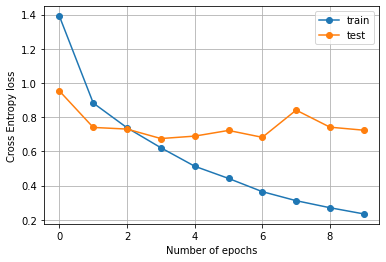

In [197]:
history.history
plt.plot(range(10), history.history['loss'], label = 'train', marker = 'o')
plt.plot(range(10), history.history['val_loss'], label = 'test', marker = 'o')
plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Cross Entropy loss")
plt.legend()
# check gradient per layer
# check weight per layer
# vanishing gradient? Exploding geradient?
# number of strides, padding?

In [202]:
for i in range(8):
    print(f'Layer: {i+1}')
    
    print("Max value: ", tf.reduce_max(model.get_weights()[i]))
    print("Min value: ", tf.reduce_min(model.get_weights()[i]))

Layer: 1
Max value:  tf.Tensor(0.71583396, shape=(), dtype=float32)
Min value:  tf.Tensor(-0.68419373, shape=(), dtype=float32)
Layer: 2
Max value:  tf.Tensor(0.0520165, shape=(), dtype=float32)
Min value:  tf.Tensor(-0.18925515, shape=(), dtype=float32)
Layer: 3
Max value:  tf.Tensor(0.40288347, shape=(), dtype=float32)
Min value:  tf.Tensor(-0.38584265, shape=(), dtype=float32)
Layer: 4
Max value:  tf.Tensor(0.10972357, shape=(), dtype=float32)
Min value:  tf.Tensor(-0.12229009, shape=(), dtype=float32)
Layer: 5
Max value:  tf.Tensor(0.3674739, shape=(), dtype=float32)
Min value:  tf.Tensor(-0.34140012, shape=(), dtype=float32)
Layer: 6
Max value:  tf.Tensor(0.5786575, shape=(), dtype=float32)
Min value:  tf.Tensor(-0.43407622, shape=(), dtype=float32)
Layer: 7
Max value:  tf.Tensor(0.387496, shape=(), dtype=float32)
Min value:  tf.Tensor(-0.46058774, shape=(), dtype=float32)
Layer: 8
Max value:  tf.Tensor(0.38457587, shape=(), dtype=float32)
Min value:  tf.Tensor(-0.32238063, shape=

In [205]:
### Glorot normal initializer + l2 regularization

### Model 2:
## He normal initialization + shuffled data
### Convnet model architecture
model3 = Sequential()
#Layer 1: Convnet 1; n_strides = 1; n_padding = none; kernel = 3x3x64
model3.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Conv2D(48, (3,3), activation = 'relu'))
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(Dropout(0.5))
model3.add(Flatten())
model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(6, activation = 'softmax'))
model3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 72, 72, 48)        13872     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 48)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 36, 36, 48)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 62208)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)             

In [207]:
model3.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [208]:
history3 = model3.fit(X_train, y_train, batch_size = 32, epochs = 10, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/10
439/439 [==============================] - 136s 311ms/step - loss: 1.1972 - accuracy: 0.5383 - val_loss: 0.9436 - val_accuracy: 0.6470
Epoch 2/10
439/439 [==============================] - 120s 273ms/step - loss: 0.8783 - accuracy: 0.6683 - val_loss: 0.7437 - val_accuracy: 0.7233
Epoch 3/10
439/439 [==============================] - 113s 258ms/step - loss: 0.7204 - accuracy: 0.7390 - val_loss: 0.7160 - val_accuracy: 0.7417
Epoch 4/10
439/439 [==============================] - 115s 261ms/step - loss: 0.6004 - accuracy: 0.7828 - val_loss: 0.6260 - val_accuracy: 0.7760
Epoch 5/10
439/439 [==============================] - 116s 265ms/step - loss: 0.5036 - accuracy: 0.8182 - val_loss: 0.5968 - val_accuracy: 0.7980
Epoch 6/10
439/439 [==============================] - 118s 269ms/step - loss: 0.4275 - accuracy: 0.8501 - val_loss: 0.5759 - val_accuracy: 0.8133
Epoch 7/10
439/439 [==============================] - 119s 271ms/step - loss: 0.3626 - accuracy: 0.8689 - val_loss: 0.5835 -

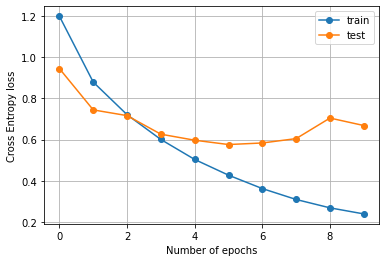

In [209]:

plt.plot(range(10), history3.history['loss'], label = 'train', marker = 'o')
plt.plot(range(10), history3.history['val_loss'], label = 'test', marker = 'o')
plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Cross Entropy loss")
plt.legend()

In [214]:
### Glorot normal initializer + l2 regularization

### Model 2:
## He normal initialization + shuffled data
### Convnet model architecture
model4 = Sequential()
#Layer 1: Convnet 1; n_strides = 1; n_padding = none; kernel = 3x3x64
model4.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3), kernel_regularizer=l2(0.01)))
model4.add(MaxPool2D(pool_size=(2, 2)))
model4.add(Conv2D(48, (3,3), activation = 'relu',kernel_regularizer=l2(0.01)))
model4.add(MaxPool2D(pool_size=(2, 2)))
model4.add(Dropout(0.5))
model4.add(Flatten())
model4.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.5))
model4.add(Dense(6, activation = 'softmax'))
model4.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 72, 72, 48)        13872     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 48)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 36, 36, 48)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 62208)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)             

In [215]:
model4.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [220]:
history4 = model4.fit(X_train, y_train, batch_size = 32, epochs = 30, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/30
439/439 [==============================] - 135s 308ms/step - loss: 1.1218 - accuracy: 0.6961 - val_loss: 1.0360 - val_accuracy: 0.7453
Epoch 2/30
439/439 [==============================] - 133s 303ms/step - loss: 1.1147 - accuracy: 0.7032 - val_loss: 1.0639 - val_accuracy: 0.7440
Epoch 3/30
439/439 [==============================] - 123s 281ms/step - loss: 1.1154 - accuracy: 0.7007 - val_loss: 1.0094 - val_accuracy: 0.7617
Epoch 4/30
439/439 [==============================] - 124s 283ms/step - loss: 1.1195 - accuracy: 0.7029 - val_loss: 1.1439 - val_accuracy: 0.6693
Epoch 5/30
439/439 [==============================] - 122s 278ms/step - loss: 1.1118 - accuracy: 0.7046 - val_loss: 0.9856 - val_accuracy: 0.7617
Epoch 6/30
439/439 [==============================] - 122s 279ms/step - loss: 1.1048 - accuracy: 0.7124 - val_loss: 0.9878 - val_accuracy: 0.7550
Epoch 7/30
439/439 [==============================] - 127s 289ms/step - loss: 1.1097 - accuracy: 0.7118 - val_loss: 1.0850 -

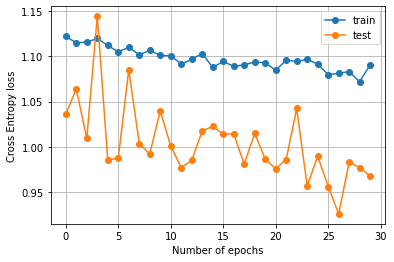

In [223]:

plt.plot(range(30), history4.history['loss'], label = 'train', marker = 'o')
plt.plot(range(30), history4.history['val_loss'], label = 'test', marker = 'o')
plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Cross Entropy loss")
plt.legend()

In [224]:
### Glorot normal initializer + l2 regularization

### Model 2:
## He normal initialization + shuffled data
### Convnet model architecture
model5 = Sequential()
#Layer 1: Convnet 1; n_strides = 1; n_padding = none; kernel = 3x3x64
model5.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3), kernel_regularizer=l2(0.001)))
model5.add(MaxPool2D(pool_size=(2, 2)))
model5.add(Conv2D(48, (3,3), activation = 'relu',kernel_regularizer=l2(0.001)))
model5.add(MaxPool2D(pool_size=(2, 2)))
model5.add(Dropout(0.5))
model5.add(Flatten())
model5.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.001)))
model5.add(Dropout(0.5))
model5.add(Dense(6, activation = 'softmax'))
model5.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 72, 72, 48)        13872     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 48)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 36, 36, 48)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 62208)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)             

In [225]:
model5.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [226]:
history5 = model5.fit(X_train, y_train, batch_size = 32, epochs = 30, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/30
439/439 [==============================] - 143s 325ms/step - loss: 1.3744 - accuracy: 0.5514 - val_loss: 1.0752 - val_accuracy: 0.6873
Epoch 2/30
439/439 [==============================] - 129s 293ms/step - loss: 1.1360 - accuracy: 0.6718 - val_loss: 1.1086 - val_accuracy: 0.6943
Epoch 3/30
439/439 [==============================] - 127s 289ms/step - loss: 1.0984 - accuracy: 0.7051 - val_loss: 1.0057 - val_accuracy: 0.7520
Epoch 4/30
439/439 [==============================] - 122s 279ms/step - loss: 1.0769 - accuracy: 0.7303 - val_loss: 1.0403 - val_accuracy: 0.7560
Epoch 5/30
439/439 [==============================] - 122s 278ms/step - loss: 1.0347 - accuracy: 0.7525 - val_loss: 0.9640 - val_accuracy: 0.7783
Epoch 6/30
439/439 [==============================] - 122s 277ms/step - loss: 1.0291 - accuracy: 0.7598 - val_loss: 0.9711 - val_accuracy: 0.7793
Epoch 7/30
439/439 [==============================] - 123s 279ms/step - loss: 0.9977 - accuracy: 0.7721 - val_loss: 0.9815 -

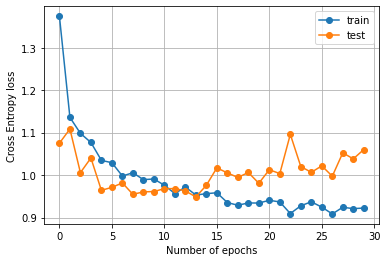

In [227]:
plt.plot(range(30), history5.history['loss'], label = 'train', marker = 'o')
plt.plot(range(30), history5.history['val_loss'], label = 'test', marker = 'o')
plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Cross Entropy loss")
plt.legend()

In [228]:
model6 = Sequential()
#Layer 1: Convnet 1; n_strides = 1; n_padding = none; kernel = 3x3x64
model6.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3), kernel_regularizer=l2(0.001)))
model6.add(MaxPool2D(pool_size=(2, 2)))
model6.add(Conv2D(48, (3,3), activation = 'relu',kernel_regularizer=l2(0.001)))
model6.add(MaxPool2D(pool_size=(2, 2)))
model6.add(Dropout(0.5))
model6.add(Flatten())
model6.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.01)))
model6.add(Dropout(0.5))
model6.add(Dense(6, activation = 'softmax'))
model6.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 72, 72, 48)        13872     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 48)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 36, 36, 48)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 62208)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)             

In [229]:
model6.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [230]:
history6 = model6.fit(X_train, y_train, batch_size = 32, epochs = 30, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/30
439/439 [==============================] - 135s 307ms/step - loss: 1.7282 - accuracy: 0.5487 - val_loss: 1.3111 - val_accuracy: 0.6390
Epoch 2/30
439/439 [==============================] - 129s 295ms/step - loss: 1.3544 - accuracy: 0.6179 - val_loss: 1.3123 - val_accuracy: 0.6160
Epoch 3/30
439/439 [==============================] - 124s 282ms/step - loss: 1.3358 - accuracy: 0.6427 - val_loss: 1.3269 - val_accuracy: 0.6763
Epoch 4/30
439/439 [==============================] - 122s 278ms/step - loss: 1.3238 - accuracy: 0.6593 - val_loss: 1.2119 - val_accuracy: 0.7190
Epoch 5/30
439/439 [==============================] - 119s 270ms/step - loss: 1.2938 - accuracy: 0.6719 - val_loss: 1.2173 - val_accuracy: 0.7083
Epoch 6/30
439/439 [==============================] - 120s 273ms/step - loss: 1.2743 - accuracy: 0.6956 - val_loss: 1.1479 - val_accuracy: 0.7383
Epoch 7/30
439/439 [==============================] - 121s 275ms/step - loss: 1.2365 - accuracy: 0.7113 - val_loss: 1.1635 -

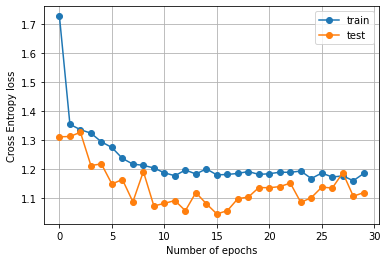

In [231]:
plt.plot(range(30), history6.history['loss'], label = 'train', marker = 'o')
plt.plot(range(30), history6.history['val_loss'], label = 'test', marker = 'o')
plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Cross Entropy loss")
plt.legend()

In [232]:
# Running model 6 with increased batch size

history7 = model6.fit(X_train, y_train, batch_size = 48, epochs = 30, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/30
293/293 [==============================] - 143s 486ms/step - loss: 1.0500 - accuracy: 0.8007 - val_loss: 1.0055 - val_accuracy: 0.8030
Epoch 2/30
293/293 [==============================] - 138s 471ms/step - loss: 1.0461 - accuracy: 0.7991 - val_loss: 0.9680 - val_accuracy: 0.8257
Epoch 3/30
293/293 [==============================] - 129s 439ms/step - loss: 1.0586 - accuracy: 0.7947 - val_loss: 1.0246 - val_accuracy: 0.8107
Epoch 4/30
293/293 [==============================] - 122s 415ms/step - loss: 1.0696 - accuracy: 0.7963 - val_loss: 1.0082 - val_accuracy: 0.8140
Epoch 5/30
293/293 [==============================] - 123s 420ms/step - loss: 1.0781 - accuracy: 0.7967 - val_loss: 1.0277 - val_accuracy: 0.8147
Epoch 6/30
293/293 [==============================] - 123s 419ms/step - loss: 1.0561 - accuracy: 0.8058 - val_loss: 1.0303 - val_accuracy: 0.8063
Epoch 7/30
293/293 [==============================] - 120s 410ms/step - loss: 1.0866 - accuracy: 0.8074 - val_loss: 1.0512 -

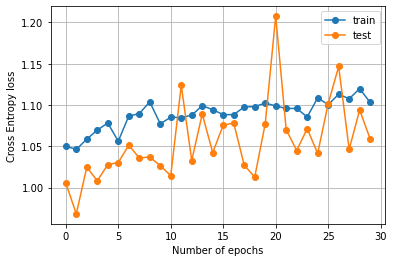

In [233]:
plt.plot(range(30), history7.history['loss'], label = 'train', marker = 'o')
plt.plot(range(30), history7.history['val_loss'], label = 'test', marker = 'o')
plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Cross Entropy loss")
plt.legend()

In [236]:

## Model 7 -- numbered as 8

model8 = Sequential()
#Layer 1: Convnet 1; n_strides = 1; n_padding = none; kernel = 3x3x64
model8.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3), kernel_regularizer=l2(0.001)))
model8.add(MaxPool2D(pool_size=(2, 2)))
model8.add(Conv2D(32, (3,3), activation = 'relu',kernel_regularizer=l2(0.001)))
model8.add(MaxPool2D(pool_size=(2, 2)))
model8.add(Dropout(0.5))
model8.add(Flatten())
model8.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.01)))
model8.add(Dropout(0.5))
model8.add(Dense(6, activation = 'softmax'))
model8.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 41472)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)             

In [237]:
model8.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [238]:
# Running model 8 

history8 = model8.fit(X_train, y_train, batch_size = 32, epochs = 30, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/30
439/439 [==============================] - 122s 279ms/step - loss: 1.6624 - accuracy: 0.5443 - val_loss: 1.3160 - val_accuracy: 0.6847
Epoch 2/30
439/439 [==============================] - 114s 259ms/step - loss: 1.3531 - accuracy: 0.6360 - val_loss: 1.2505 - val_accuracy: 0.6903
Epoch 3/30
439/439 [==============================] - 106s 241ms/step - loss: 1.3405 - accuracy: 0.6641 - val_loss: 1.2774 - val_accuracy: 0.6823
Epoch 4/30
439/439 [==============================] - 106s 241ms/step - loss: 1.3230 - accuracy: 0.6832 - val_loss: 1.2041 - val_accuracy: 0.7417
Epoch 5/30
439/439 [==============================] - 104s 236ms/step - loss: 1.3065 - accuracy: 0.7032 - val_loss: 1.1596 - val_accuracy: 0.7607
Epoch 6/30
439/439 [==============================] - 106s 242ms/step - loss: 1.2852 - accuracy: 0.7116 - val_loss: 1.1351 - val_accuracy: 0.7717
Epoch 7/30
439/439 [==============================] - 102s 233ms/step - loss: 1.2503 - accuracy: 0.7179 - val_loss: 1.1626 -

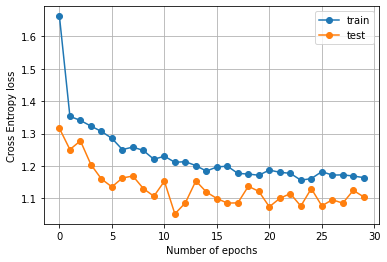

In [239]:
#refer: https://stackoverflow.com/questions/56022302/my-cnn-image-recognition-model-produces-fluctuating-validation-loss
plt.plot(range(30), history8.history['loss'], label = 'train', marker = 'o')
plt.plot(range(30), history8.history['val_loss'], label = 'test', marker = 'o')
plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Cross Entropy loss")
plt.legend()

In [241]:

## 9th model
model9 = Sequential()
#Layer 1: Convnet 1; n_strides = 1; n_padding = none; kernel = 3x3x64
model9.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3), kernel_regularizer=l2(0.001)))
model9.add(MaxPool2D(pool_size=(2, 2)))
model9.add(Conv2D(32, (3,3), activation = 'relu',kernel_regularizer=l2(0.001)))
model9.add(MaxPool2D(pool_size=(2, 2)))
model9.add(Dropout(0.5))
model9.add(Flatten())
model9.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.01)))
model9.add(Dropout(0.4))
model9.add(Dense(6, activation = 'softmax'))
model9.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 41472)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)             

In [242]:
model9.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [243]:
history9 = model9.fit(X_train, y_train, batch_size = 32, epochs = 30, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/30
439/439 [==============================] - 125s 284ms/step - loss: 1.6468 - accuracy: 0.5463 - val_loss: 1.3933 - val_accuracy: 0.5647
Epoch 2/30
439/439 [==============================] - 112s 256ms/step - loss: 1.3411 - accuracy: 0.6476 - val_loss: 1.2880 - val_accuracy: 0.6817
Epoch 3/30
439/439 [==============================] - 109s 248ms/step - loss: 1.3265 - accuracy: 0.6707 - val_loss: 1.2377 - val_accuracy: 0.7157
Epoch 4/30
439/439 [==============================] - 111s 252ms/step - loss: 1.3188 - accuracy: 0.6810 - val_loss: 1.2509 - val_accuracy: 0.7237
Epoch 5/30
439/439 [==============================] - 113s 257ms/step - loss: 1.2973 - accuracy: 0.7045 - val_loss: 1.2059 - val_accuracy: 0.7573
Epoch 6/30
439/439 [==============================] - 111s 252ms/step - loss: 1.2782 - accuracy: 0.7207 - val_loss: 1.2439 - val_accuracy: 0.7357
Epoch 7/30
439/439 [==============================] - 112s 256ms/step - loss: 1.2548 - accuracy: 0.7365 - val_loss: 1.1691 -

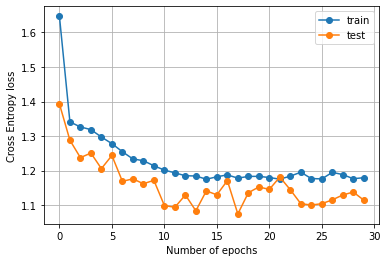

In [244]:
#refer: https://stackoverflow.com/questions/56022302/my-cnn-image-recognition-model-produces-fluctuating-validation-loss
plt.plot(range(30), history9.history['loss'], label = 'train', marker = 'o')
plt.plot(range(30), history9.history['val_loss'], label = 'test', marker = 'o')
plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Cross Entropy loss")
plt.legend()

In [245]:
model8.compile(optimizer='adagrad', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [246]:
## Runing in adagrad
history10 = model8.fit(X_train, y_train, batch_size = 32, epochs = 30, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/30
439/439 [==============================] - 126s 288ms/step - loss: 0.8627 - accuracy: 0.8278 - val_loss: 0.7986 - val_accuracy: 0.8400
Epoch 2/30
439/439 [==============================] - 110s 251ms/step - loss: 0.7731 - accuracy: 0.8447 - val_loss: 0.7625 - val_accuracy: 0.8373
Epoch 3/30
439/439 [==============================] - 112s 255ms/step - loss: 0.7407 - accuracy: 0.8452 - val_loss: 0.7359 - val_accuracy: 0.8400
Epoch 4/30
439/439 [==============================] - 112s 256ms/step - loss: 0.7091 - accuracy: 0.8490 - val_loss: 0.7177 - val_accuracy: 0.8437
Epoch 5/30
439/439 [==============================] - 110s 250ms/step - loss: 0.6850 - accuracy: 0.8549 - val_loss: 0.7037 - val_accuracy: 0.8417
Epoch 6/30
439/439 [==============================] - 109s 248ms/step - loss: 0.6661 - accuracy: 0.8552 - val_loss: 0.6912 - val_accuracy: 0.8437
Epoch 7/30
439/439 [==============================] - 109s 249ms/step - loss: 0.6534 - accuracy: 0.8581 - val_loss: 0.6825 -

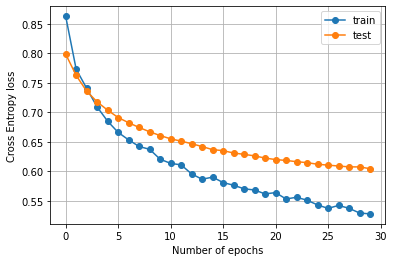

In [247]:
plt.plot(range(30), history10.history['loss'], label = 'train', marker = 'o')
plt.plot(range(30), history10.history['val_loss'], label = 'test', marker = 'o')
plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Cross Entropy loss")
plt.legend()

In [253]:
np.sum(y_test, axis =0)/X_train.shape[0]

array([0.03113866, 0.03377512, 0.0394043 , 0.03740915, 0.03634031,
       0.03569902], dtype=float32)

In [43]:
### Adding one more layer

model11 = Sequential()
#Layer 1: Convnet 1; n_strides = 1; n_padding = none; kernel = 3x3x64
model11.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3), 
                   kernel_regularizer=l2(0.001)))
model11.add(MaxPool2D(pool_size=(2, 2)))
model11.add(Conv2D(32, (3,3), activation = 'relu',kernel_regularizer=l2(0.001)))
model11.add(MaxPool2D(pool_size=(2, 2)))
model11.add(Conv2D(16, (3,3), activation = 'relu',kernel_regularizer=l2(0.001)))
model11.add(MaxPool2D(pool_size=(2, 2)))
model11.add(Dropout(0.5))
model11.add(Flatten())
model11.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.01)))
model11.add(Dropout(0.5))
model11.add(Dense(6, activation = 'softmax'))
model11.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 17, 17, 16)       

In [44]:
model11.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [45]:
history11 = model11.fit(X_train, y_train, batch_size = 32, epochs = 50, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/50
439/439 [==============================] - 130s 297ms/step - loss: 1.4719 - accuracy: 0.5544 - val_loss: 1.2098 - val_accuracy: 0.6060
Epoch 2/50
439/439 [==============================] - 112s 255ms/step - loss: 1.1844 - accuracy: 0.6370 - val_loss: 1.0937 - val_accuracy: 0.6497
Epoch 3/50
439/439 [==============================] - 108s 246ms/step - loss: 1.1022 - accuracy: 0.6937 - val_loss: 1.0148 - val_accuracy: 0.7327
Epoch 4/50
439/439 [==============================] - 103s 235ms/step - loss: 1.0595 - accuracy: 0.7210 - val_loss: 0.9723 - val_accuracy: 0.7587
Epoch 5/50
439/439 [==============================] - 105s 239ms/step - loss: 1.0321 - accuracy: 0.7339 - val_loss: 0.9816 - val_accuracy: 0.7490
Epoch 6/50
439/439 [==============================] - 107s 243ms/step - loss: 1.0042 - accuracy: 0.7513 - val_loss: 0.9721 - val_accuracy: 0.7583
Epoch 7/50
439/439 [==============================] - 12997s 30s/step - loss: 1.0008 - accuracy: 0.7542 - val_loss: 0.8802 -

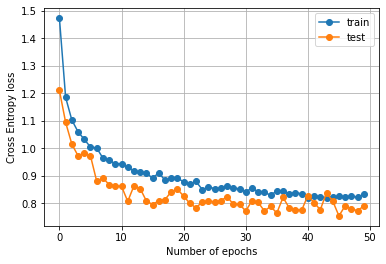

In [47]:
plt.plot(range(50), history11.history['loss'], label = 'train', marker = 'o')
plt.plot(range(50), history11.history['val_loss'], label = 'test', marker = 'o')
plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Cross Entropy loss")
plt.legend()

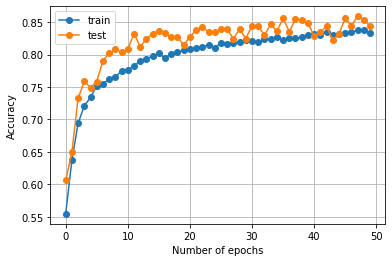

In [48]:
plt.plot(range(50), history11.history['accuracy'], label = 'train', marker = 'o')
plt.plot(range(50), history11.history['val_accuracy'], label = 'test', marker = 'o')
plt.grid()
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()

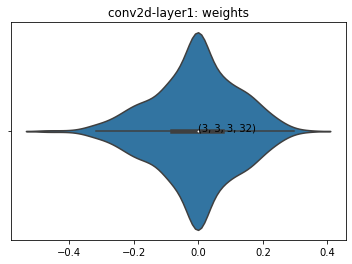

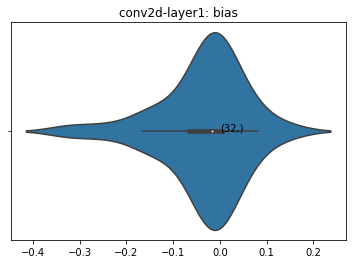

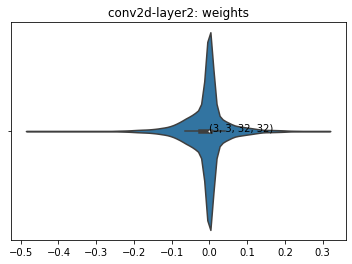

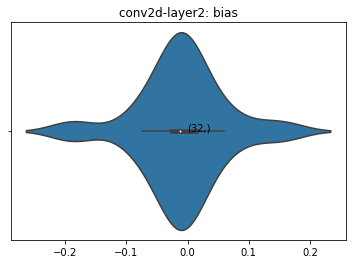

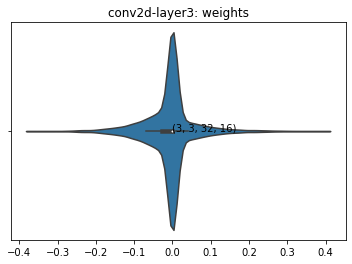

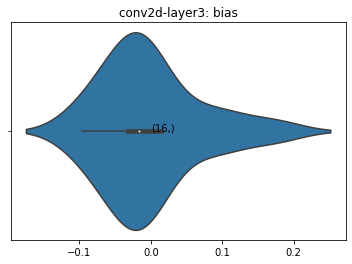

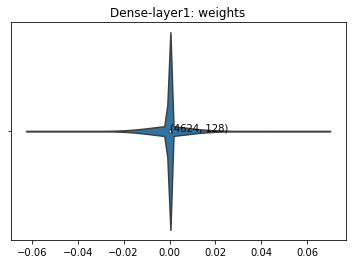

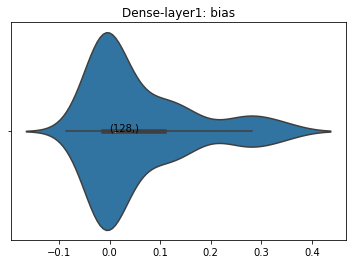

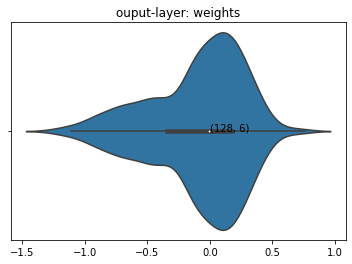

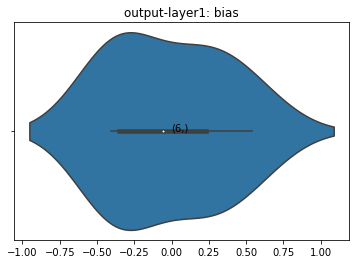

In [49]:
parameters =['conv2d-layer1: weights', 'conv2d-layer1: bias','conv2d-layer2: weights', 
             'conv2d-layer2: bias', 'conv2d-layer3: weights', 'conv2d-layer3: bias',
             'Dense-layer1: weights', 'Dense-layer1: bias',
            'ouput-layer: weights', 'output-layer1: bias',]

for i in range(len(model11.weights)):
    plt.title(parameters[i])
    plt.annotate(model11.get_weights()[i].shape, (0,0))
    sns.violinplot(model11.get_weights()[i])
    plt.show()
            

In [52]:
# checking for gradients
callback = [tf.keras.callbacks.TensorBoard(log_dir='./logs', write_grads=True)]

history_tb = model11.fit(X_train, y_train, batch_size = 32, epochs = 2, verbose = 1, validation_data=(X_test, y_test),
                        callbacks=callback)

Epoch 1/2
439/439 [==============================] - 121s 275ms/step - loss: 0.8271 - accuracy: 0.8371 - val_loss: 0.7753 - val_accuracy: 0.8503
Epoch 2/2
439/439 [==============================] - 109s 248ms/step - loss: 0.8134 - accuracy: 0.8402 - val_loss: 0.8135 - val_accuracy: 0.8423


In [59]:
import keras.backend as K
gradients = K.gradients(model11.output, model11.input)
sess = tf.compat.v1.keras.backend.get_session()
evaluated_gradients = sess.run(gradients, feed_dict={model11.input:images})

RuntimeError: tf.gradients is not supported when eager execution is enabled. Use tf.GradientTape instead.